# HW2 

In [23]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [24]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [25]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

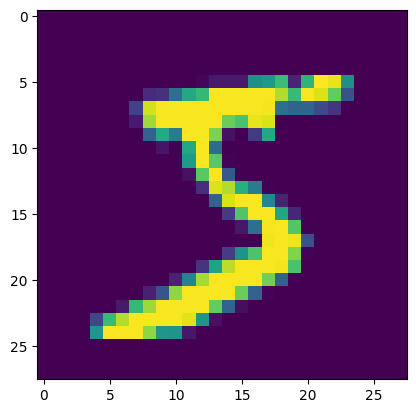

In [26]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [27]:
y= yr[0]
print(f'{y= }')

y= 5


In [28]:
xr1= xr.reshape(-1, 28*28) /255
xt1= xt.reshape(-1, 28*28) /255

In [35]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(150, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#開始訓練模型
aModel.fit(xr1, yr, 
           epochs= 30, 
           batch_size= 200)

#評估模型成效
aModel.evaluate(xt1, yt) 

Epoch 1/30
300/300 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.9006
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.1497 - accuracy: 0.9558
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9693
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9808
Epoch 6/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0420 - accuracy: 0.9871
Epoch 8/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 9/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 10/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9928

[0.11919508129358292, 0.9807999730110168]

目前我只改變最基本的epoch以及batch_size，但光是改這兩個參數能提高的效果有限，不是調愈大準確率就會愈高，是有極限的

# 我認為還能夠提升準確率的方法有：
1.增加資料集
2.調整learning rate，不可過大否則模型不會收斂；不可過小否則模型會收斂過快
3.調整layer
4.修改loss function
5.使用優化器(optimizer)，有方法一stochastic gradient decent、方法二Momentum、方法三AdaGrad以及方法四Adam(Momentum+AdaGrad)，目前最常見的方法是Adam

In [37]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 150)               117750    
                                                                 
 dense_27 (Dense)            (None, 50)                7550      
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 125,810
Trainable params: 125,810
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
